In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

 Kode ini memuat file dataset R03_excercises.csv ke dalam variabel dataset menggunakan pandas dan menampilkannya.

In [75]:
file_path = 'R03_excercises.csv'
dataset = pd.read_csv('R03_excercises.csv')
dataset

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


Mengganti nama kolom dataset menjadi x dan y untuk memudahkan pemanggilan kolom.

In [77]:
dataset.columns = ['x', 'y']
print(dataset)

      x    y
0   0.5  0.2
1   1.0  0.4
2   1.5  0.7
3   2.0  1.0
4   1.0  0.3
..  ...  ...
69  3.6  1.8
70  1.8  0.7
71  1.9  0.8
72  3.4  1.7
73  1.0  0.4

[74 rows x 2 columns]


Menghitung matriks korelasi antar kolom dalam dataset untuk melihat seberapa kuat hubungan antara variabel x dan y.

In [79]:
dataset.corr()

,x,y
x,1.000000,0.990064
y,0.990064,1.000000


Membagi dataset menjadi data latih dan data uji dengan proporsi 80:20, dengan parameter random_state=42 untuk memastikan hasil pembagian konsisten.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Memformat data latih x dan y dalam bentuk array. x_train diubah menjadi array 2D (dengan [:,np.newaxis]) agar sesuai dengan input model. Dan Membuat model regresi linier dan melatihnya menggunakan data latih x_train dan y_train.

In [83]:
x_train = dataset['x'].values[:,np.newaxis]
y_train = dataset['y'].values

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Membuat prediksi dengan memasukkan nilai x_test ke dalam model yang sudah dilatih. Hasil prediksi disimpan dalam variabel p dan ditampilkan.

In [113]:
x_test = [[5.0], [4.0], [3.0], [2.0], [1.0]]
p = lm.predict(x_test)
print(p)

[2.58499982 2.034295   1.48359017 0.93288535 0.38218052]


Menampilkan koefisien (kemiringan garis) dan intercept (titik potong dengan sumbu-y) dari model regresi linier.

In [85]:
print('Coefficient : ' + str(lm.coef_))
print('Intercept : ' + str(lm.intercept_))

Coefficient : [0.55070483]
Intercept : -0.16852430493910497


Memvisualisasikan data asli (X dan y) sebagai titik biru, serta garis model regresi linier dalam warna merah.

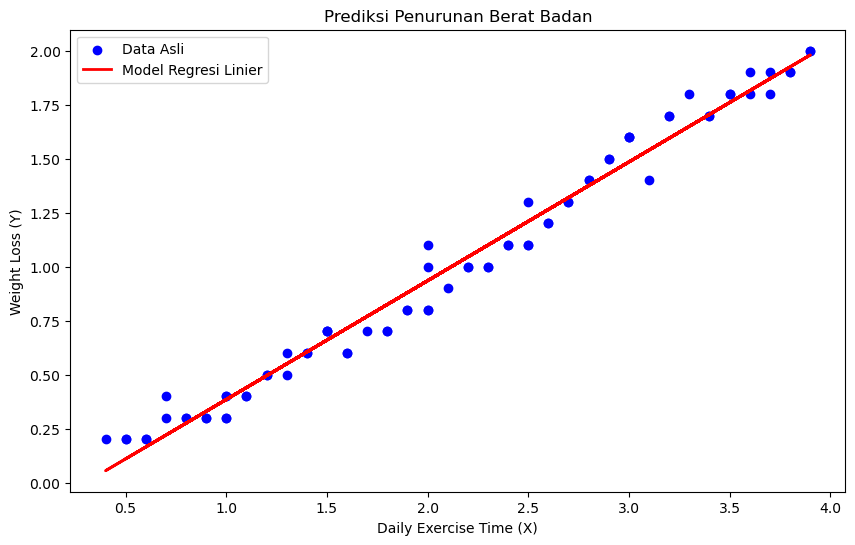

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Model Regresi Linier')
plt.xlabel('Daily Exercise Time (X)')
plt.ylabel('Weight Loss (Y)')
plt.title('Prediksi Penurunan Berat Badan')
plt.legend()
plt.show()

Menampilkan nilai Mean Squared Error (MSE) dan koefisien determinasi (R²), yang menunjukkan akurasi model dalam menjelaskan variasi data.

In [87]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.002823995538817368
R-squared (R²): 0.9915099011727163


Memeriksa akurasi model dengan membandingkan nilai y_asli dan y_hasil_prediksi. Menggunakan r2_score untuk menghitung nilai akurasi model dalam persentase.

In [116]:
y_asli = [0.8, 1.7, 0.4,]
y_hasil_prediksi = lm.predict([[1.9], [3.4], [1.0]])
print (y_hasil_prediksi)

[0.87781486 1.7038721  0.38218052]


In [89]:
akurasi = r2_score(y_asli, y_hasil_prediksi)
print(akurasi*100)

99.27958496273448
